In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Importing Data

In [2]:
col_num = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
col_cat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

column_arr = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data = pd.read_csv('./Census Income/adult.data.csv', names=column_arr, skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data['income'].value_counts(normalize=True) # Data is imbalanced

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [5]:
data.isna().sum() # Data has no null values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
data_num = data[col_num]
data_cat = data[col_cat]

df_copycat = pd.DataFrame.copy(data_cat, deep=True)

# CATEGORICAL COLUMNS

In [7]:
drop_col_cat = ['native_country']

data_cat.head(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [8]:
#df_copycat['income'] = df_copycat['income'].map({'<=50K': 0, '>50K': 1})

le = LabelEncoder()
df_copycat['income'] = le.fit_transform(df_copycat['income'])

In [9]:
df_copycat.sample(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
21000,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,0
11707,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
8812,Private,Assoc-acdm,Never-married,Adm-clerical,Not-in-family,White,Female,United-States,0


In [10]:
data_cat.sample(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
5109,Private,Bachelors,Married-spouse-absent,Other-service,Not-in-family,White,Male,United-States,<=50K
31088,Private,1st-4th,Never-married,Farming-fishing,Not-in-family,White,Male,Mexico,<=50K
17814,Private,HS-grad,Divorced,Machine-op-inspct,Other-relative,White,Female,United-States,<=50K


## Exploring workclass

In [11]:
data_cat['workclass'].value_counts(normalize=True)*100

Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64

<AxesSubplot:xlabel='count', ylabel='workclass'>

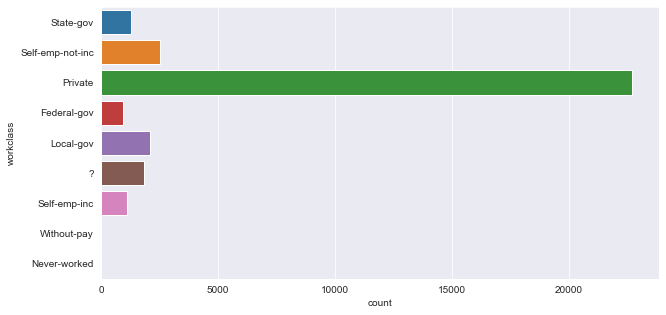

In [12]:
sns.set_style(style='darkgrid')

plt.figure(figsize=(10,5))
sns.countplot(y='workclass', data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

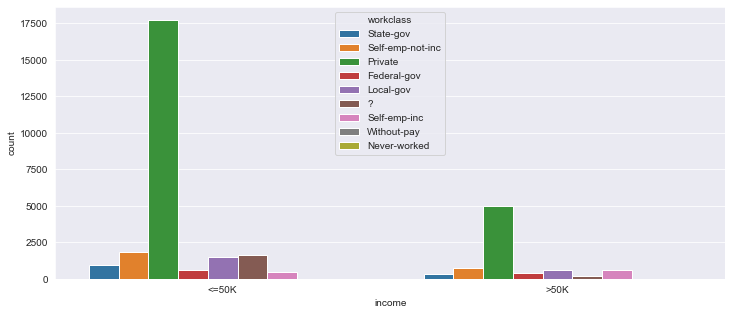

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='income', hue='workclass', data=data_cat)

### Modifying the column

In [14]:
workclass_dict = {'Without-pay': 'NP_NW', 'Never-worked': 'NP_NW'}

df_copycat['workclass'] = df_copycat['workclass'].apply(lambda x: workclass_dict[x] if x in workclass_dict else x)
df_copycat['workclass'].value_counts(normalize=True)*100

Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
NP_NW                0.064494
Name: workclass, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

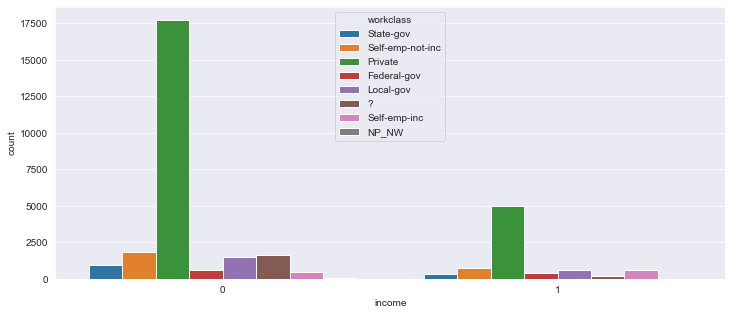

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='income', hue='workclass', data=df_copycat)

## Exploring education col

In [16]:
data_cat['education'].value_counts(normalize=True)*100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

<AxesSubplot:xlabel='count', ylabel='education'>

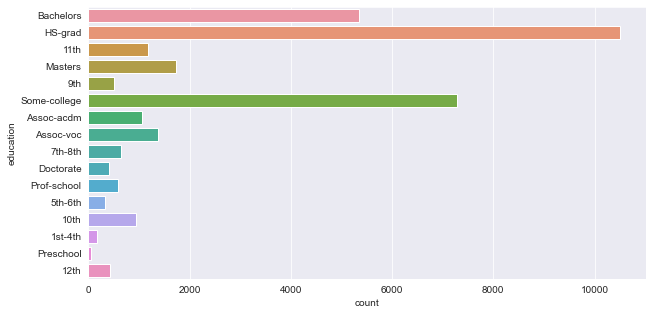

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(y='education', data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

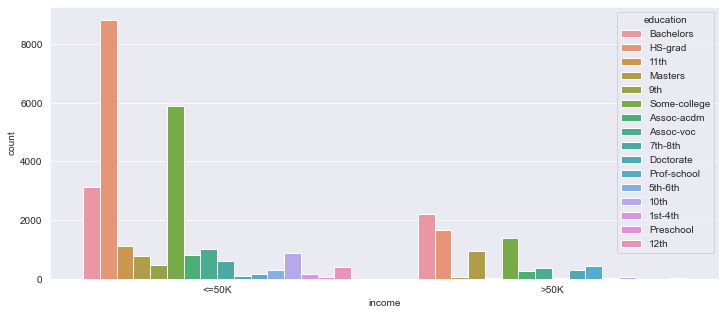

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x='income', hue='education', data=data_cat)

### Modifying the column

In [19]:
education_dict = {'11th': 'Below_HS', '9th': 'Below_HS', '7th-8th': 'Below_HS', '5th-6th': 'Below_HS', 
                  '10th': 'Below_HS', '1st-4th': 'Below_HS', 'Preschool': 'Below_HS', '12th': 'Below_HS'}

df_copycat['education'] = df_copycat['education'].apply(lambda x: education_dict[x] if x in education_dict else x)
df_copycat['education'].value_counts(normalize=True)*100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Below_HS        13.061638
Masters          5.291607
Assoc-voc        4.244341
Assoc-acdm       3.276926
Prof-school      1.768987
Doctorate        1.268389
Name: education, dtype: float64

<AxesSubplot:xlabel='count', ylabel='education'>

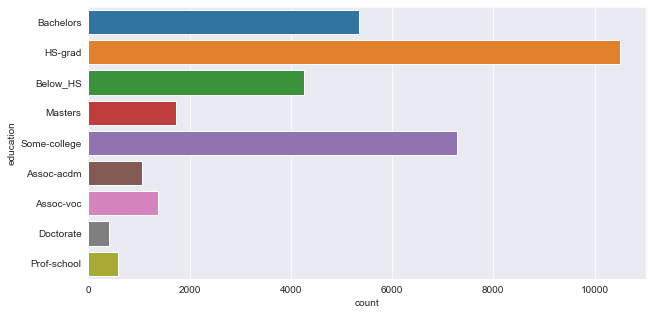

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y='education', data=df_copycat)

<AxesSubplot:xlabel='income', ylabel='count'>

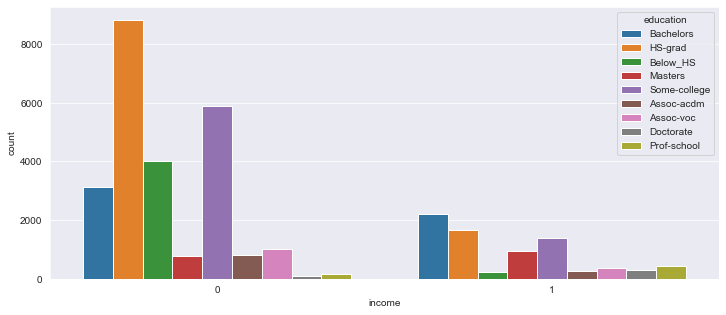

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='income', hue='education', data=df_copycat)

In [22]:
data_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


## Exploring marital_status

In [23]:
data_cat['marital_status'].value_counts(normalize=True)

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64

<AxesSubplot:xlabel='count', ylabel='marital_status'>

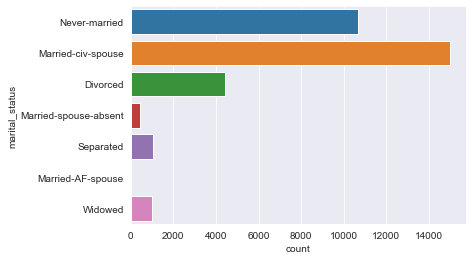

In [24]:
sns.countplot(y='marital_status', data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

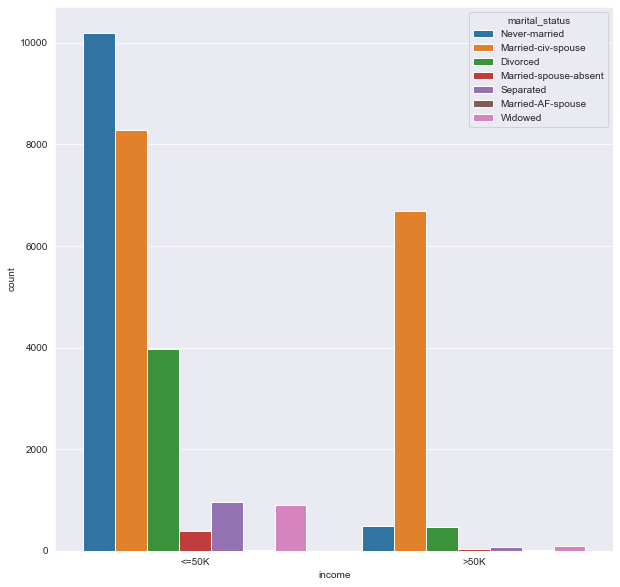

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x='income', hue='marital_status', data=data_cat)

### Modifying the column

In [26]:
marital_status_dict = {'Divorced': 'DSW', 'Separated': 'DSW', 'Widowed': 'DSW', 'Married-spouse-absent': 'MSA_AF', 'Married-AF-spouse': 'MSA_AF'}
df_copycat['marital_status'] = df_copycat['marital_status'].apply(lambda x: marital_status_dict[x] if x in marital_status_dict else x)
df_copycat['marital_status'].value_counts()

Married-civ-spouse    14976
Never-married         10683
DSW                    6461
MSA_AF                  441
Name: marital_status, dtype: int64

## Exploring occupation col

In [27]:
data_cat['occupation'].value_counts(normalize=True)

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: occupation, dtype: float64

<AxesSubplot:xlabel='count', ylabel='occupation'>

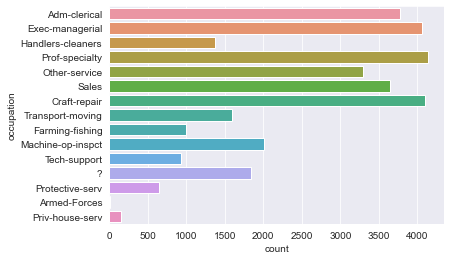

In [28]:
sns.countplot(y='occupation', data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

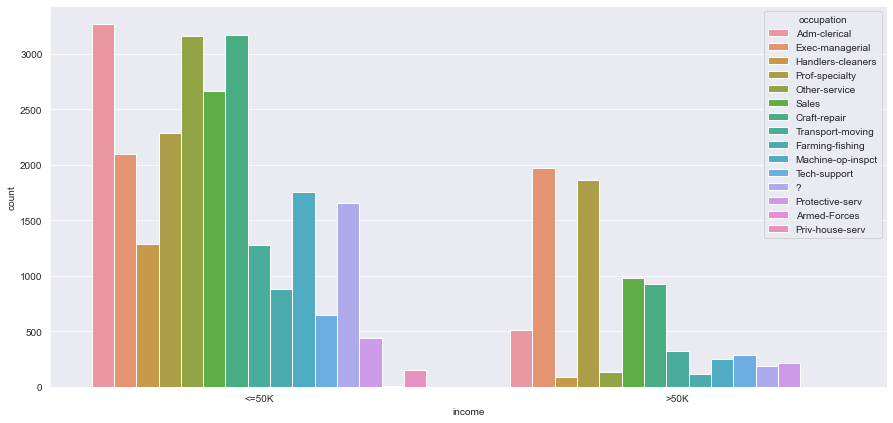

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='income', hue='occupation', data=data_cat)

In [30]:
df_copycat.head(5)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,DSW,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,Below_HS,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


### Modifying the column

In [31]:
df_copycat['occupation'] = df_copycat['occupation'].apply(lambda x: 'Other-service' if x is '?' else x)

In [32]:
df_copycat['occupation'].value_counts(normalize=True)*100

Other-service        15.779614
Prof-specialty       12.714597
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Machine-op-inspct     6.148460
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: occupation, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

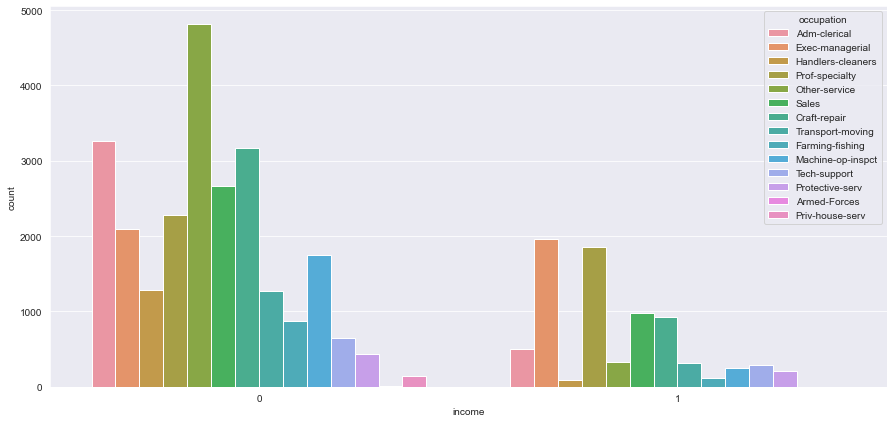

In [33]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(15,7))
sns.countplot(x='income', hue='occupation', data=df_copycat)

## Exploring relationship col

In [34]:
data_cat['relationship'].value_counts(normalize=True)*100

Husband           40.517797
Not-in-family     25.505973
Own-child         15.564633
Unmarried         10.583213
Wife               4.815577
Other-relative     3.012807
Name: relationship, dtype: float64

<AxesSubplot:xlabel='count', ylabel='relationship'>

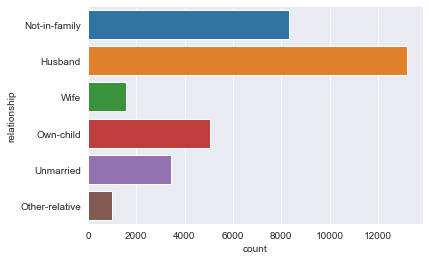

In [35]:
sns.countplot(y='relationship', data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

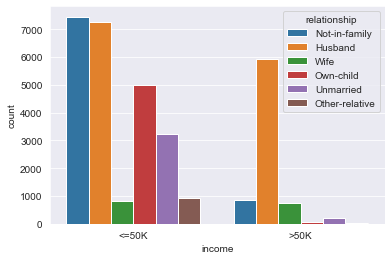

In [36]:
sns.countplot(x='income', hue='relationship', data=data_cat)

## Exploring 'race' col

<AxesSubplot:xlabel='count', ylabel='race'>

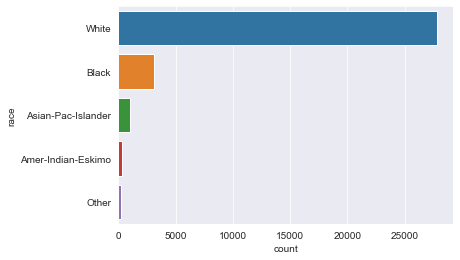

In [37]:
#plt.figure(figsize=(9,4))
sns.countplot(y='race', data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

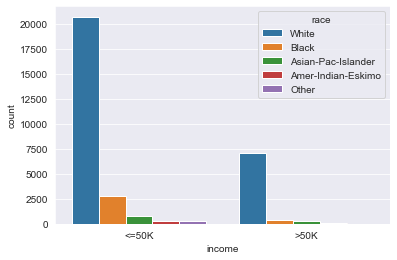

In [38]:
sns.countplot(x='income', data=data_cat, hue='race')

In [39]:
data_cat['race'].value_counts(normalize=True)

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64

In [40]:
grp_race = data_cat.groupby(by='race')
dict_race = data_cat['race'].value_counts().to_dict()

In [41]:
for k,v in dict_race.items():
    print(k, v)
    print(grp_race.get_group(k)['income'].value_counts(normalize=True).to_dict())

White 27816
{'<=50K': 0.7441400632729365, '>50K': 0.2558599367270636}
Black 3124
{'<=50K': 0.8761203585147247, '>50K': 0.12387964148527529}
Asian-Pac-Islander 1039
{'<=50K': 0.7343599615014437, '>50K': 0.26564003849855633}
Amer-Indian-Eskimo 311
{'<=50K': 0.8842443729903537, '>50K': 0.1157556270096463}
Other 271
{'<=50K': 0.9077490774907749, '>50K': 0.09225092250922509}


## Exploring 'sex' Column

In [42]:
data_cat['sex'].value_counts(normalize=True)

Male      0.669205
Female    0.330795
Name: sex, dtype: float64

<AxesSubplot:xlabel='count', ylabel='sex'>

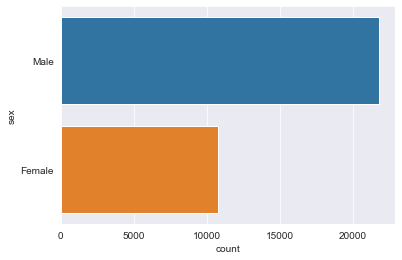

In [43]:
sns.countplot(y='sex',data=data_cat)

<AxesSubplot:xlabel='income', ylabel='count'>

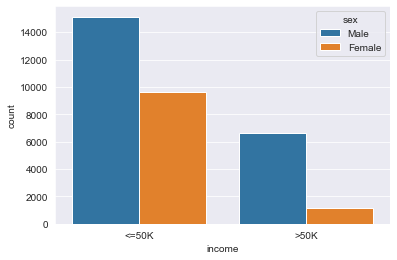

In [44]:
sns.countplot(x='income', hue='sex', data=data_cat)

### Exploring 'native_country' Column - Decided to drop this one

<AxesSubplot:xlabel='count', ylabel='native_country'>

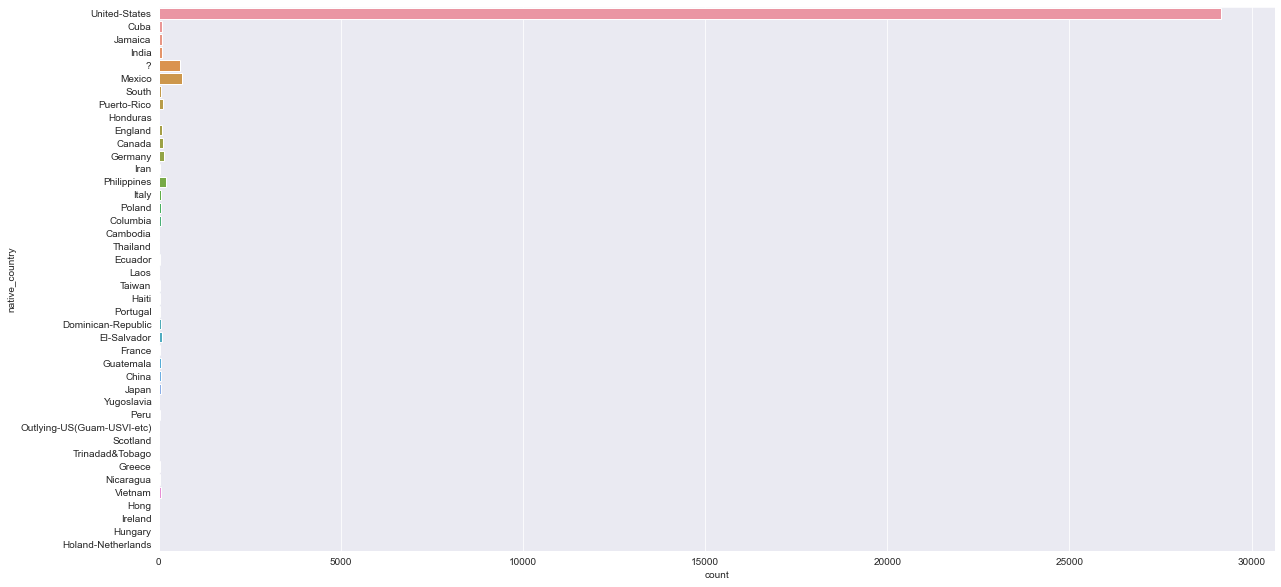

In [45]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(y='native_country', data=data_cat)

In [46]:
data_grp = data_cat.groupby(by='native_country')
data_grp.get_group('United-States')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [47]:
data_grp.get_group('United-States')['income'].value_counts(normalize=True).to_dict()

{'<=50K': 0.7541652382584847, '>50K': 0.24583476174151525}

In [48]:
dict_country = data['native_country'].value_counts().to_dict()

In [49]:
for k,v in dict_country.items():
    print(k, v)
    print(data_grp.get_group(k)['income'].value_counts(normalize=True).to_dict())

United-States 29170
{'<=50K': 0.7541652382584847, '>50K': 0.24583476174151525}
Mexico 643
{'<=50K': 0.9486780715396579, '>50K': 0.05132192846034215}
? 583
{'<=50K': 0.7495711835334476, '>50K': 0.2504288164665523}
Philippines 198
{'<=50K': 0.6919191919191919, '>50K': 0.30808080808080807}
Germany 137
{'<=50K': 0.6788321167883211, '>50K': 0.32116788321167883}
Canada 121
{'<=50K': 0.6776859504132231, '>50K': 0.32231404958677684}
Puerto-Rico 114
{'<=50K': 0.8947368421052632, '>50K': 0.10526315789473684}
El-Salvador 106
{'<=50K': 0.9150943396226415, '>50K': 0.08490566037735849}
India 100
{'<=50K': 0.6, '>50K': 0.4}
Cuba 95
{'<=50K': 0.7368421052631579, '>50K': 0.2631578947368421}
England 90
{'<=50K': 0.6666666666666666, '>50K': 0.3333333333333333}
Jamaica 81
{'<=50K': 0.8765432098765432, '>50K': 0.12345679012345678}
South 80
{'<=50K': 0.8, '>50K': 0.2}
China 75
{'<=50K': 0.7333333333333333, '>50K': 0.26666666666666666}
Italy 73
{'<=50K': 0.6575342465753424, '>50K': 0.3424657534246575}
Domini

### Comparing the modified and original categorical columns

In [50]:
data_cat.sample(15,random_state=42)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
14160,Private,Some-college,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K
27048,State-gov,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
28868,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,>50K
5667,Private,Bachelors,Never-married,Machine-op-inspct,Not-in-family,White,Female,United-States,<=50K
7827,Self-emp-not-inc,Some-college,Divorced,Craft-repair,Not-in-family,White,Male,United-States,<=50K
15382,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
4641,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8943,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Other,Female,United-States,<=50K
216,Private,Assoc-acdm,Divorced,Sales,Not-in-family,White,Female,United-States,<=50K
5121,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K


In [51]:
df_copycat.sample(15, random_state=42)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
14160,Private,Some-college,DSW,Adm-clerical,Not-in-family,White,Female,United-States,0
27048,State-gov,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,0
28868,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,1
5667,Private,Bachelors,Never-married,Machine-op-inspct,Not-in-family,White,Female,United-States,0
7827,Self-emp-not-inc,Some-college,DSW,Craft-repair,Not-in-family,White,Male,United-States,0
15382,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,1
4641,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
8943,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Other,Female,United-States,0
216,Private,Assoc-acdm,DSW,Sales,Not-in-family,White,Female,United-States,0
5121,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,1


### Dropping the unnecessary columns

In [52]:
df_copycat = df_copycat.drop(columns=drop_col_cat)

df_copycat.sample(15,random_state=42)

,workclass,education,marital_status,occupation,relationship,race,sex,income
14160,Private,Some-college,DSW,Adm-clerical,Not-in-family,White,Female,0
27048,State-gov,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,0
28868,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Black,Male,1
5667,Private,Bachelors,Never-married,Machine-op-inspct,Not-in-family,White,Female,0
7827,Self-emp-not-inc,Some-college,DSW,Craft-repair,Not-in-family,White,Male,0
15382,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,1
4641,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,1
8943,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Other,Female,0
216,Private,Assoc-acdm,DSW,Sales,Not-in-family,White,Female,0
5121,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,1


## Building the model

In [59]:
df = pd.concat([df_copycat,data_num],axis=1)
df.sample(10, random_state=42)

,workclass,education,marital_status,occupation,relationship,race,sex,income,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
14160,Private,Some-college,DSW,Adm-clerical,Not-in-family,White,Female,0,27,160178,10,0,0,38
27048,State-gov,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,45,50567,9,0,0,40
28868,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Black,Male,1,29,185908,13,0,0,55
5667,Private,Bachelors,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,30,190040,13,0,0,40
7827,Self-emp-not-inc,Some-college,DSW,Craft-repair,Not-in-family,White,Male,0,29,189346,10,2202,0,50
15382,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,1,51,108435,14,0,0,47
4641,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,58,93664,9,15024,0,60
8943,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Other,Female,0,22,148431,9,0,0,40
216,Private,Assoc-acdm,DSW,Sales,Not-in-family,White,Female,0,50,313321,12,0,0,40
5121,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,1,50,71417,9,3103,0,40


### Transformers and creating training, validation sets

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

features_num = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
features_cat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

In [61]:
transformer = ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(), features_cat), 
                                              ('RobustScaler', RobustScaler(), features_num)], 
                                              remainder='passthrough', sparse_threshold=0)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['income']), df['income'], test_size=0.1)

In [63]:
x_train.sample(3)

,workclass,education,marital_status,occupation,relationship,race,sex,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
27828,Self-emp-not-inc,HS-grad,MSA_AF,Other-service,Unmarried,Black,Female,37,286146,9,0,0,40
4762,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,31,315128,10,0,0,52
28305,Private,HS-grad,DSW,Machine-op-inspct,Not-in-family,White,Male,38,241962,9,0,0,40


In [64]:
x_train_transformed = transformer.fit_transform(x_train)
x_val_transformed = transformer.transform(x_val)

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf_rndforest = RandomForestClassifier(n_estimators=100)

In [66]:
clf_rndforest.fit(x_train_transformed, y_train)

RandomForestClassifier()

In [67]:
y_pred = clf_rndforest.predict(x_val_transformed)

In [68]:
clf_rndforest.score(x_val_transformed, y_val)

0.8467915259441203

In [69]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()

In [70]:
x_resampled, y_resampled = smote.fit_resample(x_train_transformed, y_train)

In [71]:
clf_rndforest1 = RandomForestClassifier(n_estimators=100)
clf_rndforest1.fit(x_resampled, y_resampled)

RandomForestClassifier()

In [72]:
clf_rndforest1.score(x_val_transformed, y_val)

0.8415719987718759

In [73]:
from sklearn.decomposition import PCA
n_components = [5,10,15,20,25,30,35,40,45,50,54]

for i in n_components:
    pca = PCA(n_components=i)
    xtrain_pca = pca.fit_transform(x_resampled)
    xval_pca = pca.transform(x_val_transformed)
    
    clf_rnd = RandomForestClassifier(n_estimators=100)
    clf_rnd.fit(xtrain_pca, y_resampled)
    print('pca n_comp='+str(i)+', Score= ',clf_rnd.score(xval_pca,y_val))
    
    print(classification_report(y_val, clf_rnd.predict(xval_pca)))

pca n_comp=5, Score=  0.8259134172551428
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2480
           1       0.61      0.76      0.68       777

    accuracy                           0.83      3257
   macro avg       0.76      0.80      0.78      3257
weighted avg       0.84      0.83      0.83      3257

pca n_comp=10, Score=  0.8311329444273872
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2480
           1       0.62      0.76      0.68       777

    accuracy                           0.83      3257
   macro avg       0.77      0.81      0.78      3257
weighted avg       0.85      0.83      0.84      3257

pca n_comp=15, Score=  0.8305188824071231
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2480
           1       0.62      0.74      0.68       777

    accuracy                           0.83      3257
   

pca n_comp=30, Score=  0.8326680994780473
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2480
           1       0.63      0.71      0.67       777

    accuracy                           0.83      3257
   macro avg       0.77      0.79      0.78      3257
weighted avg       0.84      0.83      0.84      3257



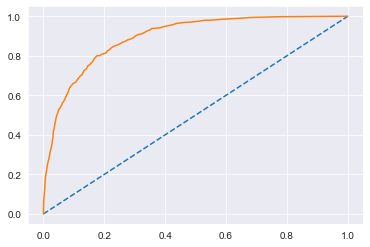

In [74]:
pca = PCA(n_components=30)
xtrain_pca = pca.fit_transform(x_resampled)
xval_pca = pca.transform(x_val_transformed)

clf_rnd = RandomForestClassifier(n_estimators=100)
clf_rnd.fit(xtrain_pca, y_resampled)

print('pca n_comp=30, Score= ',clf_rnd.score(xval_pca,y_val))

fpr, tpr, threshold = roc_curve(y_val, clf_rnd.predict_proba(xval_pca)[:,1])

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)
roc_auc_score(y_val, clf_rnd.predict_proba(xval_pca)[:,1])

print(classification_report(y_val, clf_rnd.predict(xval_pca)))

In [75]:
print(classification_report(y_val, clf_rnd.predict(xval_pca)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2480
           1       0.63      0.71      0.67       777

    accuracy                           0.83      3257
   macro avg       0.77      0.79      0.78      3257
weighted avg       0.84      0.83      0.84      3257



<AxesSubplot:>

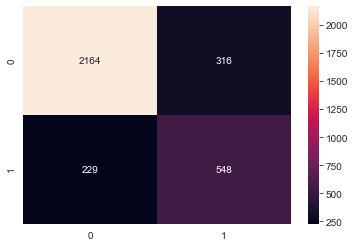

In [76]:
sns.set_style(style='darkgrid')
cm = confusion_matrix(y_val, clf_rnd.predict(xval_pca))
sns.heatmap(cm, annot=True, fmt='.5g')

### GBM

In [78]:
from sklearn.decomposition import PCA
n_components = [5,10,15,20,25,30,35,40,45,50,54]

for i in n_components:
    pca = PCA(n_components=i)
    xtrain_pca = pca.fit_transform(x_resampled)
    xval_pca = pca.transform(x_val_transformed)
    
    clf_gbm = GradientBoostingClassifier()
    clf_gbm.fit(xtrain_pca, y_resampled)
    print('pca n_comp='+str(i)+', Score= ',clf_gbm.score(xval_pca,y_val))
    print(classification_report(y_val, clf_gbm.predict(xval_pca)))

pca n_comp=5, Score=  0.7936751611912803
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2480
           1       0.54      0.82      0.65       777

    accuracy                           0.79      3257
   macro avg       0.74      0.80      0.75      3257
weighted avg       0.84      0.79      0.81      3257

pca n_comp=10, Score=  0.8035001535155051
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2480
           1       0.56      0.84      0.67       777

    accuracy                           0.80      3257
   macro avg       0.75      0.82      0.77      3257
weighted avg       0.85      0.80      0.81      3257

pca n_comp=15, Score=  0.8041142155357691
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2480
           1       0.56      0.83      0.67       777

    accuracy                           0.80      3257
   